# Numerisk derivasjon og integrasjon

## Teoridel

### Forskjell på numerisk og analytisk derivasjon

Analytisk derivasjon sitt mål er å finne en ny funskjon (f'(x)) slik at f'(x) er lik stigningstallet til hver tankent i punktet (x, f(x)). Analytisk derivasjon handler altså om å finne den konkrete og perfekte endringen, ikke en tilnærming. Dette gjøres slik:
$\frac{d}{{dx}}f\left( x \right) = \mathop {\lim }\limits_{\Delta \to 0} \frac{{f\left( {x + \Delta } \right) - f\left( x \right)}}{\Delta}$

Merk at den deriverte er definert som hva en tilnærming blir når delta når 0.

På den andre siden, er numerisk derivasjon bare vandlig analytisk derivasjon, men med en konkret liten $\Delta$. Vi kan altså skrive definesjonen til den numeriske deriverte i punktet x som:
$\frac{{f\left( {x + \Delta } \right) - f\left( x \right)}}{\Delta}$

Der $\Delta$ er betydelig liten. Ofte 0.001.

Numerisk derivasjon er altså forskjellen i f delt på $\Delta$ (forskjellen i x), for små verdier av $\Delta$. Det er altså bare gjennomsnittlig økning over en kort $\Delta$. Derfor gir det mening at $\Delta$ må være så liten som mulig får å gi en god tilnærming til den deriverte ("momentanfart").

Numerisk derivasjon gir altså en brukbar verdi, selv om den ikke er "perfekt".

### Numerisk integrasjon

Integrasjon sitt mål er å finne "arealet" under en kurve, definert utifra en funskjon. Grunnen til at jeg skriver "areal" og ikke areal, er fordi at i integrasjon, kan areal være negativ. Så positiv og negativ areal kansellerer hverandre ut.

Dette kan gjøres numerisk på en ganske naturlig og enkel måte:
$\int_{a}^{b} f(x) = \sum_{n=0}^{N} f(n) \frac{(b - a)}{N}$.
Der N skal være så stort som mulig, for større nøyaktighet. Teorient bak dette er at man deler arealet i N rektangler, og summerer opp arealet av de rektanglene. Høyden og bredden til rektanglene er altså $f(n)$ og $\frac{b - a}{N}$ respektivt. Og jo flere rektangler man har, jo mer presis blir arealet.

## 7.3

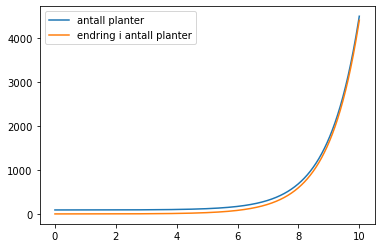

In [4]:
from pylab import *

def N(t):
    return 0.2 * e ** t + 90

fs = []
ders = []
dt = 1e-3
for t in arange(0, 10, dt):
    f = N(t)
    
    if (len(fs) > 0):
        df = f - fs[-1]
        ders.append(df / dt)
    
    fs.append(f)

plot(arange(0, 10, dt), fs, label="antall planter")
plot(arange(dt, 10, dt), ders, label="endring i antall planter")

legend()

show()

## 7.9

temperaturen synker med 3.8624231019213084 ved element 42 i lista


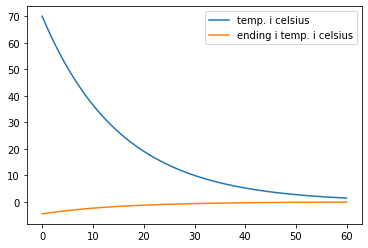

In [112]:
def newtons_kvotient(f, x, dx=1e-3):
    df = f(x + dx) - f(x)
    return df / dx

def T(t):
    return 70 * e ** (-0.065 * t)

ts = [t * 60 / 1000 for t in range(1000)]

ders = [newtons_kvotient(T, t) for t in ts]
Ts = [T(t) for t in ts]

plot(ts, Ts, label="temp. i celsius")
plot(ts, ders, label="ending i temp. i celsius")

legend()

print('temperaturen synker med', -ders[42], 'ved element 42 i lista')

## 7.12

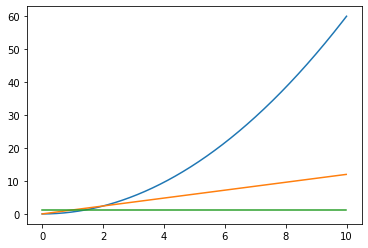

In [79]:
lines = loadtxt("posisjon.txt", delimiter="        ", skiprows=1)
ts = lines[:, 0]
ps = lines[:, 1]

def der(data):
    fs, xs = data
    vels = []
    for i in range(len(fs) - 1):
        df = fs[i + 1] - fs[i]
        dx = xs[i + 1] - xs[i]
        vels.append(df / dx)
    return vels

vels = der((ps, ts))
accs = der((vels, ts))
    
plot(ts, ps)
plot(ts[:-1], vels)
plot(ts[:-2], accs)

##  7.14

In [11]:
def integrate_rects(f, start=0, end=10, dx=1e-3):
    result = 0
    for x in arange(start, end, dx):
        result += f(x)
    return result * dx

def integrate_traps(f, start=0, end=10, dx=1e-3):
    part_sum = 0
    for x in arange(start + dx, end - dx, dx):
        part_sum += f(x)
    return (part_sum + (f(start) + f(end)) / 2) * dx

def integrate_midpt(f, start=0, end=10, dx=1e-3):

    result = 0
    for x in arange(start + dx / 2, end, dx):
        result += f(x)
    return result * dx

def integrate_simps(f, start=0, end=10, dx=1e-3):
    n = (end - start) / dx
    k = 0.0
    x = start + dx
    for i in range(1, n/2 + 1):
        k += 4*f(x)
        x += 2*h

    x = start + 2*h
    for i in range(1, n/2):
        k += 2 * f(x)
        x += 2 * dx
    return (dx/3) * (f(a) + f(b) + k)

In [12]:
def test_integration(f, f_string, start=0, end=10, dx=1e-3):
    with_rects = integrate_rects(f, start, end, dx)
    with_traps = integrate_traps(f, start, end, dx)
    with_midpt = integrate_midpt(f, start, end, dx)
    with_simps = integrate_simps(f, start, end, dx)
    
    print('integral of', f_string, f"from {start} to {end} with dx: {dx}:")
    print(4*' ', 'using rectangles:', with_rects)
    print(4*' ', 'using trapezoids:', with_traps)
    print(4*' ', 'using midpoints: ',  with_midpt)
    print(4*' ', 'using simpsons: ',  with_simps)
    print()

In [13]:
test_integration(lambda x : 2 * x + 1, '2x + 1')
test_integration(lambda x : x**2 - 4 * x + 5, 'x^2 - 4x + 5')
test_integration(lambda x : e**x, 'e^x')
test_integration(lambda x : e**x - 5 * x, 'e^x - 5x')
test_integration(lambda x : 6 * sqrt(x) - x, '6√x - x')
test_integration(lambda x : 5 * e ** (-2 * x), '5e^(-2x)')
test_integration(lambda x : sqrt(log(x)), '√(ln(x))', start=1)
test_integration(lambda x : 4 * log(x ** 2), '4ln(x^2)', start=1)
test_integration(lambda x : 4 * 5 ** (x**3 - 2 * x), '4 * 5^(x^3 - 2x)', end=3)

NameError: name 'a' is not defined